# ERDDAPY library

In the previous lesson, we downloaded our dataset file to our local machine. Now we will not download it to your local machine, but use in in your python environment directly. 

Erddapy is a package that helps create the ERDDAP URLs. You can create virtually any request like, searching for datasets, acquiring metadata, downloading data, etc.

## Searching datasets using erddapy
Step 1: Initiate the ERDDAP URL constructor for a server ( erddapy server object).

In [54]:
#searching datasets based on words
from erddapy import ERDDAP
e = ERDDAP(
    server="https://erddap.bco-dmo.org/erddap", 
    protocol="tabledap", 
    response="csv")


Search with keywords

In [55]:
import pandas as pd
url = e.get_search_url(search_for="Temperature OC1603B", response="csv")

print (url)
pd.read_csv(url)["Dataset ID"]


https://erddap.bco-dmo.org/erddap/search/advanced.csv?page=1&itemsPerPage=1000&protocol=tabledap&cdm_data_type=(ANY)&institution=(ANY)&ioos_category=(ANY)&keywords=(ANY)&long_name=(ANY)&standard_name=(ANY)&variableName=(ANY)&minLon=(ANY)&maxLon=(ANY)&minLat=(ANY)&maxLat=(ANY)&minTime=&maxTime=&searchFor=Temperature+OC1603B


0    bcodmo_dataset_817214
1    bcodmo_dataset_817952
Name: Dataset ID, dtype: object

Inspect the metadata of dataset with id bcodmo_dataset_817952:

In [74]:
#find the variables
info_url = e.get_info_url(dataset_id="bcodmo_dataset_817952")
pd.read_csv(info_url)

pd.set_option('display.max_rows', None) #make sure that jupyter notebook shows all rows
dataframe = pd.read_csv(info_url)
dataframe



,Row Type,Variable Name,Attribute Name,Data Type,Value
0,attribute,NC_GLOBAL,access_formats,String,".htmlTable,.csv,.json,.mat,.nc,.tsv,.esriCsv,...."
1,attribute,NC_GLOBAL,acquisition_description,String,Full details for collection and analyses of un...
2,attribute,NC_GLOBAL,awards_0_award_nid,String,772629
3,attribute,NC_GLOBAL,awards_0_award_number,String,OCE-1459480
4,attribute,NC_GLOBAL,awards_0_data_url,String,http://www.nsf.gov/awardsearch/showAward.do?Aw...
5,attribute,NC_GLOBAL,awards_0_funder_name,String,NSF Division of Ocean Sciences
6,attribute,NC_GLOBAL,awards_0_funding_acronym,String,NSF OCE
7,attribute,NC_GLOBAL,awards_0_funding_source_nid,String,355
8,attribute,NC_GLOBAL,awards_0_program_manager,String,Henrietta N Edmonds
9,attribute,NC_GLOBAL,awards_0_program_manager_nid,String,51517


In [75]:
#get the unique variable names with pandas
dataframe["Variable Name"].unique()



array(['NC_GLOBAL', 'Cruise', 'latitude', 'longitude', 'Date_Time_PST',
       'Temperature', 'Salinity', 'PN', 'POC', 'Beam_attenuation', 'time'],
      dtype=object)

Exercise:  
* What are the units of POC?
* Who is the Principal Investigator on this dataset?
* What is the start and end time of this dataset?


Exercise: What are the unique variables for "bcodmo_dataset_807119"?

#find the variables
info_url = e.get_info_url(dataset_id="bcodmo_dataset_807119")
pd.read_csv(info_url)

pd.set_option('display.max_rows', None) #make sure that jupyter notebook shows all rows
dataframe = pd.read_csv(info_url)
dataframe

#get the unique variable names with pandas
dataframe["Variable Name"].unique()

## Import BCO-DMO temperature dataset - Oregon Coast
### Part 1: Create the URL 

From the dataset above, we are going to import the variables longitude, latitude, time and Temperature. The time constraints will be netween January 13th and January 16th. 

Step 1: Initiate the ERDDAP URL constructor for a server ( erddapy server object).

In [58]:
#Import erddap package into 
from erddapy import ERDDAP

e = ERDDAP(
    server= "https://erddap.bco-dmo.org/erddap/",
    protocol="tabledap",
    response="csv",
)

Step 2: Populate the object with a dataset id, variables of interest, and its constraints. We can download the csvp response with the .to_pandas method.

In [59]:
e.dataset_id = "bcodmo_dataset_817952"
e.variables = [
    "longitude",
    "latitude",
    "time",
    "Temperature"
]
e.constraints = {
    "time>=": "2017-01-13T00:00:00Z",
    "time<=": "2017-01-16T23:59:59Z",}

Check the URL

In [60]:
# Print the URL - check
url = e.get_download_url()
print(url)

https://erddap.bco-dmo.org/erddap/tabledap/bcodmo_dataset_817952.csv?longitude,latitude,time,Temperature&time>=1484265600.0&time<=1484611199.0


### Part 2: Import your dataset into pandas 
We can import the csv response using the erddapy the .to_pandas method.

In [61]:
# Convert URL to pandas dataframe
df_bcodmo = e.to_pandas(  
    parse_dates=True,
).dropna()

Check out your dataset in pandas

In [62]:
# print the dataframe to check what data is in there specifically. 
df_bcodmo.head()

,longitude (degrees_east),latitude (degrees_north),time (UTC),Temperature (degrees Celsius (\u00b0C))
1,-124.2675,44.6501,2017-01-13T03:03:00Z,9.32
2,-124.3432,44.6500,2017-01-13T03:26:00Z,10.72
3,-124.4943,44.6498,2017-01-13T04:13:00Z,10.58
4,-124.4899,44.6371,2017-01-13T05:00:00Z,10.67
5,-124.5320,44.6363,2017-01-13T05:46:00Z,10.59


In [63]:
# print the column names
print (df_bcodmo.columns)

Index(['longitude (degrees_east)', 'latitude (degrees_north)', 'time (UTC)',
       'Temperature (degrees Celsius (\u00b0C))'],
      dtype='object')


There is a weird name in the title, rename the column to correct this

In [64]:
df_bcodmo.rename(columns={df_bcodmo.columns.values[3]: 'Temperature (degrees Celsius)'}, inplace=True)
print (df_bcodmo.columns)

Index(['longitude (degrees_east)', 'latitude (degrees_north)', 'time (UTC)',
       'Temperature (degrees Celsius)'],
      dtype='object')


Subset the tabular data further in pandas based on the time  
Step 1: convert the time to a datetime object to take out the time

In [65]:
import pandas as pd
# convert to datetime object to be able to work with it in pandas
print (df_bcodmo.dtypes)

df_bcodmo["time (UTC)"] = pd.to_datetime (df_bcodmo["time (UTC)"], format = "%Y-%m-%dT%H:%M:%S")
print (df_bcodmo.dtypes)

longitude (degrees_east)         float64
latitude (degrees_north)         float64
time (UTC)                        object
Temperature (degrees Celsius)    float64
dtype: object
longitude (degrees_east)                     float64
latitude (degrees_north)                     float64
time (UTC)                       datetime64[ns, UTC]
Temperature (degrees Celsius)                float64
dtype: object


Only select the rows for January 13th

In [66]:
df_bcodmo_13 =  df_bcodmo[df_bcodmo["time (UTC)"].dt.day == 13]
df_bcodmo_13

,longitude (degrees_east),latitude (degrees_north),time (UTC),Temperature (degrees Celsius)
1,-124.2675,44.6501,2017-01-13 03:03:00+00:00,9.32
2,-124.3432,44.6500,2017-01-13 03:26:00+00:00,10.72
3,-124.4943,44.6498,2017-01-13 04:13:00+00:00,10.58
4,-124.4899,44.6371,2017-01-13 05:00:00+00:00,10.67
5,-124.5320,44.6363,2017-01-13 05:46:00+00:00,10.59
6,-124.4652,44.6426,2017-01-13 06:09:00+00:00,10.70
7,-124.2765,44.6503,2017-01-13 06:55:00+00:00,9.62
8,-124.1287,44.6522,2017-01-13 07:51:00+00:00,9.46
9,-124.1783,44.6500,2017-01-13 08:37:00+00:00,9.55
10,-124.1775,44.6474,2017-01-13 09:00:00+00:00,9.17


When you inspect the dataset, you can see that some hours have multiple data points, while others have only 1 data point. Let's average the dataset over every hour using the groupby function

In [67]:
df_bcodmo_13_average = df_bcodmo_13.groupby(df_bcodmo["time (UTC)"].dt.hour)[['Temperature (degrees Celsius)','longitude (degrees_east)','latitude (degrees_north)']].mean().reset_index()
df_bcodmo_13_average

,time (UTC),Temperature (degrees Celsius),longitude (degrees_east),latitude (degrees_north)
0,3,10.020,-124.30535,44.65005
1,4,10.580,-124.49430,44.64980
2,5,10.630,-124.51095,44.63670
3,6,10.160,-124.37085,44.64645
4,7,9.460,-124.12870,44.65220
5,8,9.550,-124.17830,44.65000
6,9,9.285,-124.17865,44.64745
7,10,9.290,-124.22390,44.65020
8,11,9.485,-124.23285,44.64760
9,12,9.530,-124.26950,44.65020


Plot your averaged dataset in pandas

<AxesSubplot:xlabel='longitude (degrees_east)', ylabel='latitude (degrees_north)'>

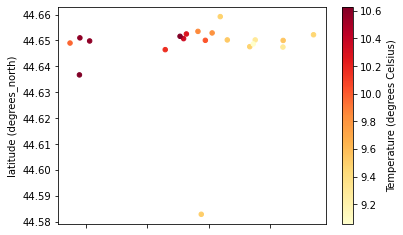

In [71]:
df_bcodmo_13_average.plot (
    x='longitude (degrees_east)',
    y='latitude (degrees_north)', 
    kind = 'scatter',
    c='Temperature (degrees Celsius)',
    colormap="YlOrRd")

Exercise: 
Create the URL for this dataset with the variable POC instead of temperature

#Import erddap package into 
from erddapy import ERDDAP

e = ERDDAP(
    server= "https://erddap.bco-dmo.org/erddap/",
    protocol="tabledap",
    response="csv",
)

e.dataset_id = "bcodmo_dataset_817952"
e.variables = [
    "longitude",
    "latitude",
    "time",
    "POC"
]
e.constraints = {
    "time>=": "2017-01-13T00:00:00Z",
    "time<=": "2017-01-16T23:59:59Z",}
    
#Print the URL - check
url = e.get_download_url()
print(url)